## KHÓA HỌC: LẬP TRÌNH PYTHON CĂN BẢN
-----
Phân tích và xử lý dữ liệu với Pandas - Phần 01
----


# 1) Giới thiệu
---
**Pandas** là một thư viện mã nguồn mở được xây dựng dựa trên NumPy, sử dụng để thao tác và phân tích dữ liệu. Với Pandas chúng ta có thể:
Xử lý tập dữ liệu khác nhau về định dạng: chuỗi thời gian, bảng không đồng nhất, ma trận dữ liệu
* Import dữ liệu từ nhiều nguồn khác nhau như CSV, DB/SQL…
* Xử lý vô số phép toán cho tập dữ liệu: subsetting, slicing, filtering, merging, groupBy, re-ordering, and re-shaping,..
* Xử lý dữ liệu mất mát theo mong muốn.
* Xử lý, phân tích dữ liệu tốt như mô hình hoá và thống kê.
* Tích hợp tốt với các thư viện khác của python.

https://pandas.pydata.org/

In [329]:
#Kiểm tra phiên bản của thư viện Pandas
import pandas as pd
print('Version Pandas: ',pd.__version__)

Version Pandas:  1.4.3


# 2) Làm việc với các đối tượng trong Pandas
---
## 2.1) Series

**Series** là mảng một chiều (1D) giống như kiểu vector trong Numpy, hay như một cột của một bảng, nhưng nó bao gồm thêm một bảng đánh index.

In [330]:
#Khai báo sử dụng thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [331]:
#Tạo một đối tượng series
#index mặc định đánh số từ 0
data = pd.Series([2.8, 3, 4.44, 5])
data

0    2.80
1    3.00
2    4.44
3    5.00
dtype: float64

In [332]:
#Mỗi một đối tượng series bao gồm 2 thành phần
#1. Values
#2. index
print('Values:', data.values)
print('Indices:', data.index)

Values: [2.8  3.   4.44 5.  ]
Indices: RangeIndex(start=0, stop=4, step=1)


In [333]:
#Tạo một đối tượng series với index thiết lập
data = pd.Series([1.25, 2, 3.5, 4.75, 8.0],
                 index=['a', 'b', 'c', 'd','k'])
data

a    1.25
b    2.00
c    3.50
d    4.75
k    8.00
dtype: float64

In [334]:
print('Values:', data.values)
print('Indices:', data.index)

Values: [1.25 2.   3.5  4.75 8.  ]
Indices: Index(['a', 'b', 'c', 'd', 'k'], dtype='object')


In [335]:
#Truy cập tới một phần tử trong series thông qua index hoặc thứ tự
print('Phần tử có index = b:', data['b'])
print('Phần tử ở vị trí 1  :', data[1])

Phần tử có index = b: 2.0
Phần tử ở vị trí 1  : 2.0


In [336]:
#Tạo đối tượng series từ một biến kiểu Dictionary
#Chỉ số được tự động sắp xếp.
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict,name='Population_USA')
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
Name: Population_USA, dtype: int64

In [337]:
#View tên của series
population.name

'Population_USA'

In [338]:
population['Florida']

19552860

In [339]:
#Chuyển đổi từ dữ liệu vector sang series
a_vector = np.array([8,12,9,0,7,11])

a_series = pd.Series(a_vector,dtype='float')
a_series


0     8.0
1    12.0
2     9.0
3     0.0
4     7.0
5    11.0
dtype: float64

## 1.2) DataFrame
---

In [340]:
#Tạo DataFrame từ các Series
area_dict = {'California': 423967, 
             'Texas': 695662, 
             'New York': 141297,
             'Florida': 170312, 
             'Illinois': 149995}
area = pd.Series(area_dict, name='Area_USA')
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: Area_USA, dtype: int64

In [341]:
data_usa = pd.DataFrame({'population':population,
                         'area':area})
data_usa

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [342]:
#Tương tự như series, DataFrame cũng có thuộc tính values và index
df_values = data_usa.values
df_index = data_usa.index
print('Values of DataFrame:\n',df_values)
print('Index of DataFrame:\n',df_index)

Values of DataFrame:
 [[38332521   423967]
 [26448193   695662]
 [19651127   141297]
 [19552860   170312]
 [12882135   149995]]
Index of DataFrame:
 Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')


In [343]:
#Tạo một DataFrame từ một biến Dict
#Chỉ số được tạo mặc định từ 0
data_dict = {
    'apples': [3, 2, 0, 1], 
    'oranges': [0, 3, 7, 2]}

purchases = pd.DataFrame(data_dict)
purchases

,apples,oranges
0,3,0
1,2,3
2,0,7
3,1,2


In [344]:
#Tạo DataFrame với index thiết lập
purchases = pd.DataFrame(data_dict, 
                         index=['June', 'Robert', 'Lily', 'David'])
purchases

,apples,oranges
June,3,0
Robert,2,3
Lily,0,7
David,1,2


# 3) Đọc dữ liệu từ các nguồn khác nhau (CSV, Excel)
---
## 3.1) Đọc file CSV
* CSV là một định dạng dữ liệu văn bản đơn giản có tên đầy đủ là Comma Separated Values. Với định dạng CSV này, các giá trị được chia tách với nhau bởi các dấu phẩy. Định dạng CSV phổ biến bởi vì chúng có tính tương thích cao, dễ dàng di chuyển từ phần mềm này sang phần mềm khác để sử dụng mà không lo gặp các xung đột.

* Tài liệu CSV cũng làm một trong những tài liệu phổ biến trên thế giới với khả năng lưu trữ nhỏ nhẹ.


In [345]:
import pandas as pd
path = 'D:\Source Code\Data_Analysis_Programming\Exercise_3\data\csv_Data_BMI.csv'
#Sử dụng phương thức read_csv
data = pd.read_csv(path)
#Hiển thị thông tin biến Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Personal   500 non-null    object
 1   Gender     500 non-null    object
 2   Height_cm  500 non-null    int64 
 3   Weight_kg  500 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 15.8+ KB


In [346]:
#VÍ DỤ 1:
#Sử dụng phương thức read_csv()
#Tham số: Thiết lập cột index là cột Personal
data1 = pd.read_csv(path,
                    index_col=0)
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, P1 to P500
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Gender     500 non-null    object
 1   Height_cm  500 non-null    int64 
 2   Weight_kg  500 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 15.6+ KB


In [347]:
#VÍ DỤ 2:
#Sử dụng phương thức read_csv()
#Thiết lập số hàng, cột muốn đọc dữ liệu
data2 = pd.read_csv(path,
                    nrows=100,
                    usecols=['Height_cm', 'Weight_kg'])
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Height_cm  100 non-null    int64
 1   Weight_kg  100 non-null    int64
dtypes: int64(2)
memory usage: 1.7 KB


In [348]:
#VÍ DỤ 3:
#Thiết lập tham số đọc dữ liệu từ dòng thứ 5 trong file
#và đặt lại tên của các cột dữ liệu
data3 = pd.read_csv(path,
                    names=['ID','Sex','H(cm)','W(kg)'],
                    skiprows=5)
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      496 non-null    object
 1   Sex     496 non-null    object
 2   H(cm)   496 non-null    int64 
 3   W(kg)   496 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 15.6+ KB


## THỰC HÀNH 3.1
---
**Yêu cầu 1: Học viên đọc dữ liệu dạng CSV lưu trong file Data_Loan.csv với các tham số mặc định**

In [349]:
#{HỌC VIÊN VIẾT CODE Ở ĐÂY}
df = pd.read_csv("D:\Source Code\Data_Analysis_Programming\Exercise_3\data\csv_Data_Loan.csv")
df.info()
df.head()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163987 entries, 0 to 163986
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   loan_amnt              163987 non-null  int64  
 1   term                   163987 non-null  object 
 2   int_rate               163987 non-null  float64
 3   emp_length             158183 non-null  float64
 4   home_ownership         163987 non-null  object 
 5   annual_inc             163983 non-null  float64
 6   purpose                163987 non-null  object 
 7   addr_state             163987 non-null  object 
 8   dti                    163987 non-null  float64
 9   delinq_2yrs            163958 non-null  float64
 10  revol_util             163794 non-null  float64
 11  total_acc              163958 non-null  float64
 12  bad_loan               163987 non-null  int64  
 13  longest_credit_length  163958 non-null  float64
 14  verification_status    163987 non-nu

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
0,5000,36 months,10.65,10.0,RENT,24000.0,credit_card,AZ,27.65,0.0,83.7,9.0,0,26.0,verified
1,2500,60 months,15.27,0.0,RENT,30000.0,car,GA,1.00,0.0,9.4,4.0,1,12.0,verified
2,2400,36 months,15.96,10.0,RENT,12252.0,small_business,IL,8.72,0.0,98.5,10.0,0,10.0,not verified
3,10000,36 months,13.49,10.0,RENT,49200.0,other,CA,20.00,0.0,21.0,37.0,0,15.0,verified
4,5000,36 months,7.90,3.0,RENT,36000.0,wedding,AZ,11.20,0.0,28.3,12.0,0,7.0,verified


**Yêu cầu 2: Đọc dữ liệu từ file Data_Loan.CSV vào 2 biến DataFrame tương ứng**
1. df_number: Chỉ chứa các cột dữ liệu số
2. df_object: Chỉ chứa các cột dữ liệu Object

In [350]:
#{HỌC VIÊN VIẾT CODE Ở ĐÂY}
df_number = pd.read_csv("D:\Source Code\Data_Analysis_Programming\Exercise_3\data\csv_Data_Loan.csv", names= ['loan_amt',
'int_rate','emp_length','annual_inc','dti','deling_2yrs','revol_util','total_acc','bad_loan','longest_credit_length'])
df_object =  pd.read_csv('D:\Source Code\Data_Analysis_Programming\Exercise_3\data\csv_Data_Loan.csv',usecols = ['term','home_ownership','purpose','addr_state','verification_status'])



C:\Users\DANG QUOC TOAN\AppData\Local\Temp\ipykernel_20528\4214520364.py:2: DtypeWarning: Columns (0,2,3,5,8,9,10,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df_number = pd.read_csv("D:\Source Code\Data_Analysis_Programming\Exercise_3\data\csv_Data_Loan.csv", names= ['loan_amt',


## Đọc file Excel
---

In [351]:
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [352]:
import pandas as pd
path_excel = 'D:\Source Code\Data_Analysis_Programming\Exercise_3\data\excel_Data_Point.xlsx'
#Đọc dữ liệu từ file excel
data_ex = pd.read_excel(path_excel)
data_ex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   STT        66 non-null     int64  
 1   Mã SV      66 non-null     int64  
 2   Họ         66 non-null     object 
 3   Tên        66 non-null     object 
 4   Ngày sinh  66 non-null     object 
 5   Tên Lớp    66 non-null     object 
 6   A          66 non-null     float64
 7   B1         66 non-null     float64
 8   B2         66 non-null     float64
 9   C1         66 non-null     float64
 10  C2         66 non-null     float64
dtypes: float64(5), int64(2), object(4)
memory usage: 5.8+ KB


In [353]:
#VÍ DỤ 1:
#Đọc dữ liệu tại sheet đầu tiên, 
#Chỉ lấy dữ liệu cột Mã SV và các cột điểm 
#Thiết lập cột đầu tiên làm index
data_ex1 = pd.read_excel(path_excel,
                        sheet_name='4080130_01',
                        usecols=[1,6,7,8,9,10],
                        index_col=0)
data_ex1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 1621050322 to 1621050013
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       66 non-null     float64
 1   B1      66 non-null     float64
 2   B2      66 non-null     float64
 3   C1      66 non-null     float64
 4   C2      66 non-null     float64
dtypes: float64(5)
memory usage: 3.1 KB


In [354]:
#VÍ DỤ 2:
#Đọc dữ liệu tại sheet 2, 
#Trường hợp: sử dụng các tham số mặc định
data_ex2 = pd.read_excel(path_excel,
                        sheet_name=1)
data_ex2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Cộng Hòa Xã Hội Chủ Nghĩa Việt Nam  45 non-null     object
 1   Unnamed: 1                          40 non-null     object
 2   Unnamed: 2                          40 non-null     object
 3   Unnamed: 3                          40 non-null     object
 4   Unnamed: 4                          42 non-null     object
 5   Unnamed: 5                          40 non-null     object
 6   Unnamed: 6                          40 non-null     object
 7   Unnamed: 7                          40 non-null     object
 8   Unnamed: 8                          40 non-null     object
 9   Unnamed: 9                          40 non-null     object
 10  Unnamed: 10                         40 non-null     object
dtypes: object(11)
memory usage: 4.2+ KB


In [355]:
#VÍ DỤ 3:
#Đọc dữ liệu tại sheet '4080130_02',từ dòng 9
data_ex3 = pd.read_excel(path_excel,
                         sheet_name='4080130_02',
                         skiprows=9)
data_ex3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   STT        39 non-null     int64  
 1   Mã SV      39 non-null     int64  
 2   Họ         39 non-null     object 
 3   Tên        39 non-null     object 
 4   Ngày sinh  39 non-null     object 
 5   Tên Lớp    39 non-null     object 
 6   A          39 non-null     float64
 7   B1         39 non-null     float64
 8   B2         39 non-null     float64
 9   C1         39 non-null     float64
 10  C2         39 non-null     float64
dtypes: float64(5), int64(2), object(4)
memory usage: 3.5+ KB


In [356]:
#VÍ DỤ 4
#Đọc dữ liệu từ sheet: '4080130_03'
#Dữ liệu không chứa dòng header
data_ex4 = pd.read_excel(path_excel,
                        sheet_name='4080130_03',
                        header=None)
data_ex4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       39 non-null     int64  
 1   1       39 non-null     int64  
 2   2       39 non-null     object 
 3   3       39 non-null     object 
 4   4       39 non-null     object 
 5   5       39 non-null     object 
 6   6       39 non-null     float64
 7   7       39 non-null     float64
 8   8       39 non-null     float64
 9   9       39 non-null     float64
 10  10      39 non-null     float64
dtypes: float64(5), int64(2), object(4)
memory usage: 3.5+ KB


In [357]:
#Ví dụ 4.1
#Đọc dữ liệu từ sheet: '4080130_03'
#Dữ liệu không chứa dòng header
#Đặt tên cho các cột
data_ex41 = pd.read_excel(path_excel,
                        sheet_name='4080130_03',
                        header=None,
                        usecols=[1,6,7,8,9,10],
                        names=['Mã SV','A','B1','B2','C1','C2'],
                        index_col=0)
data_ex41.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 1621050041 to 1621050034
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       39 non-null     float64
 1   B1      39 non-null     float64
 2   B2      39 non-null     float64
 3   C1      39 non-null     float64
 4   C2      39 non-null     float64
dtypes: float64(5)
memory usage: 1.8 KB


## THỰC HÀNH 3.2
--- 
Yêu cầu: Học viên đọc dữ liệu dạng excel lưu trong file excel_Data_Movies.xls theo từng sheet

In [358]:
#{HỌC VIÊN VIẾT CODE Ở ĐÂY}
!pip install xlrd





Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [359]:
path = 'D:\Source Code\Data_Analysis_Programming\Exercise_3\data\excel_Data_Movies.xls'
data_ex1 = pd.read_excel(path,sheet_name=0,index_col=0)
data_ex2 = pd.read_excel(path,sheet_name=1,index_col=0)
data_ex3 = pd.read_excel(path,sheet_name=2,index_col=0)
data_ex1.head(5)

,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,Director,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
Title,,,,,,,,,,,,,,,,,,,,,
Intolerance: Love's Struggle Throughout the Ages,1916,Drama|History|War,NaN,USA,Not Rated,123,1.33,385907.0,NaN,D.W. Griffith,...,436,22,9.0,481,691,1,10718,88,69.0,8.0
Over the Hill to the Poorhouse,1920,Crime|Drama,NaN,USA,NaN,110,1.33,100000.0,3000000.0,Harry F. Millarde,...,2,2,0.0,4,0,1,5,1,1.0,4.8
The Big Parade,1925,Drama|Romance|War,NaN,USA,Not Rated,151,1.33,245000.0,NaN,King Vidor,...,81,12,6.0,108,226,0,4849,45,48.0,8.3
Metropolis,1927,Drama|Sci-Fi,German,Germany,Not Rated,145,1.33,6000000.0,26435.0,Fritz Lang,...,136,23,18.0,203,12000,1,111841,413,260.0,8.3
Pandora's Box,1929,Crime|Drama|Romance,German,Germany,Not Rated,110,1.33,NaN,9950.0,Georg Wilhelm Pabst,...,426,20,3.0,455,926,1,7431,84,71.0,8.0


In [360]:
data_ex2.head(5)


,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
List Movies from 2000 to 2009,,,,,,,,,,,,,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Title,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,Director,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
102 Dalmatians,2000,Adventure|Comedy|Family,English,USA,G,100,1.85,85000000,66941559,Kevin Lima,...,2000,795,439,4182,372,1,26413,77,84,4.8
28 Days,2000,Comedy|Drama,English,USA,PG-13,103,1.37,43000000,37035515,Betty Thomas,...,12000,10000,664,23864,0,1,34597,194,116,6


In [361]:
data_ex3.head(5)

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127 Hours,2010.0,Adventure|Biography|Drama|Thriller,English,USA,R,94.0,1.85,18000000.0,18329466.0,Danny Boyle,...,11000.0,642.0,223.0,11984.0,63000.0,0.0,279179.0,440.0,450.0,7.6
3 Backyards,2010.0,Drama,English,USA,R,88.0,NaN,300000.0,NaN,Eric Mendelsohn,...,795.0,659.0,301.0,1884.0,92.0,0.0,554.0,23.0,20.0,5.2
3,2010.0,Comedy|Drama|Romance,German,Germany,Unrated,119.0,2.35,NaN,59774.0,Tom Tykwer,...,24.0,20.0,9.0,69.0,2000.0,0.0,4212.0,18.0,76.0,6.8


# 3) Quan sát và truy suất dữ liệu từ DataFrame
---
## 3.1) Quan sát dữ liệu

In [362]:
#Đọc dữ liệu mẫu được lưu trữ trong file csv
path='D:\Source Code\Data_Analysis_Programming\Exercise_3\data\csv_Data_Loan.csv'
df_loan=pd.read_csv(path)
df_loan

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
0,5000,36 months,10.65,10.0,RENT,24000.0,credit_card,AZ,27.65,0.0,83.7,9.0,0,26.0,verified
1,2500,60 months,15.27,0.0,RENT,30000.0,car,GA,1.00,0.0,9.4,4.0,1,12.0,verified
2,2400,36 months,15.96,10.0,RENT,12252.0,small_business,IL,8.72,0.0,98.5,10.0,0,10.0,not verified
3,10000,36 months,13.49,10.0,RENT,49200.0,other,CA,20.00,0.0,21.0,37.0,0,15.0,verified
4,5000,36 months,7.90,3.0,RENT,36000.0,wedding,AZ,11.20,0.0,28.3,12.0,0,7.0,verified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163982,15000,60 months,12.39,3.0,MORTGAGE,45000.0,credit_card,OK,31.44,4.0,75.8,34.0,0,20.0,not verified
163983,20000,36 months,14.99,10.0,OWN,80000.0,home_improvement,VA,23.65,0.0,68.8,18.0,0,22.0,verified
163984,12825,36 months,17.14,6.0,MORTGAGE,38000.0,debt_consolidation,TX,9.03,0.0,70.7,24.0,0,9.0,not verified
163985,27650,60 months,21.99,0.0,RENT,60000.0,credit_card,NY,10.10,1.0,61.2,20.0,0,6.0,verified


In [363]:
#Quan sát dữ liệu biến DataFrame
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163987 entries, 0 to 163986
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   loan_amnt              163987 non-null  int64  
 1   term                   163987 non-null  object 
 2   int_rate               163987 non-null  float64
 3   emp_length             158183 non-null  float64
 4   home_ownership         163987 non-null  object 
 5   annual_inc             163983 non-null  float64
 6   purpose                163987 non-null  object 
 7   addr_state             163987 non-null  object 
 8   dti                    163987 non-null  float64
 9   delinq_2yrs            163958 non-null  float64
 10  revol_util             163794 non-null  float64
 11  total_acc              163958 non-null  float64
 12  bad_loan               163987 non-null  int64  
 13  longest_credit_length  163958 non-null  float64
 14  verification_status    163987 non-nu

In [364]:
#Hiển thị 10 dòng đầu tiên
df_loan.head(12)

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
0,5000,36 months,10.65,10.0,RENT,24000.0,credit_card,AZ,27.65,0.0,83.7,9.0,0,26.0,verified
1,2500,60 months,15.27,0.0,RENT,30000.0,car,GA,1.00,0.0,9.4,4.0,1,12.0,verified
2,2400,36 months,15.96,10.0,RENT,12252.0,small_business,IL,8.72,0.0,98.5,10.0,0,10.0,not verified
3,10000,36 months,13.49,10.0,RENT,49200.0,other,CA,20.00,0.0,21.0,37.0,0,15.0,verified
4,5000,36 months,7.90,3.0,RENT,36000.0,wedding,AZ,11.20,0.0,28.3,12.0,0,7.0,verified
5,3000,36 months,18.64,9.0,RENT,48000.0,car,CA,5.35,0.0,87.5,4.0,0,4.0,verified
6,5600,60 months,21.28,4.0,OWN,40000.0,small_business,CA,5.55,0.0,32.6,13.0,1,7.0,verified
7,5375,60 months,12.69,0.0,RENT,15000.0,other,TX,18.08,0.0,36.5,3.0,1,7.0,verified
8,6500,60 months,14.65,5.0,OWN,72000.0,debt_consolidation,AZ,16.12,0.0,20.6,23.0,0,13.0,not verified
9,12000,36 months,12.69,10.0,OWN,75000.0,debt_consolidation,CA,10.78,0.0,67.1,34.0,0,22.0,verified


In [365]:
#Hiển thị 5 dòng cuối cùng của biến df_loan
df_loan.tail()

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
163982,15000,60 months,12.39,3.0,MORTGAGE,45000.0,credit_card,OK,31.44,4.0,75.8,34.0,0,20.0,not verified
163983,20000,36 months,14.99,10.0,OWN,80000.0,home_improvement,VA,23.65,0.0,68.8,18.0,0,22.0,verified
163984,12825,36 months,17.14,6.0,MORTGAGE,38000.0,debt_consolidation,TX,9.03,0.0,70.7,24.0,0,9.0,not verified
163985,27650,60 months,21.99,0.0,RENT,60000.0,credit_card,NY,10.10,1.0,61.2,20.0,0,6.0,verified
163986,17000,60 months,15.99,10.0,MORTGAGE,63078.0,debt_consolidation,PA,31.70,0.0,54.0,28.0,0,16.0,verified


In [366]:
#Hiển thị kích thước df_loan (rows x columns)
df_loan.shape

(163987, 15)

In [367]:
#Danh sách tên các columns trong df
df_loan.columns

Index(['loan_amnt', 'term', 'int_rate', 'emp_length', 'home_ownership',
       'annual_inc', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'revol_util', 'total_acc', 'bad_loan', 'longest_credit_length',
       'verification_status'],
      dtype='object')

In [368]:
#Kiếm tra giá trị null trong Df
df_loan.isnull()

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163982,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
163983,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
163984,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
163985,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [369]:
#Thống kê số lượng null theo cột
df_loan.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
emp_length               5804
home_ownership              0
annual_inc                  4
purpose                     0
addr_state                  0
dti                         0
delinq_2yrs                29
revol_util                193
total_acc                  29
bad_loan                    0
longest_credit_length      29
verification_status         0
dtype: int64

In [370]:
#Cho biết số dòng dữ liệu không null
df_loan.count()

loan_amnt                163987
term                     163987
int_rate                 163987
emp_length               158183
home_ownership           163987
annual_inc               163983
purpose                  163987
addr_state               163987
dti                      163987
delinq_2yrs              163958
revol_util               163794
total_acc                163958
bad_loan                 163987
longest_credit_length    163958
verification_status      163987
dtype: int64

In [371]:
#Số phần tử trong df (= rows x columns)
df_loan.size

2459805

In [372]:
#Kiểu dữ liệu của từng columns trong df
df_loan.dtypes

loan_amnt                  int64
term                      object
int_rate                 float64
emp_length               float64
home_ownership            object
annual_inc               float64
purpose                   object
addr_state                object
dti                      float64
delinq_2yrs              float64
revol_util               float64
total_acc                float64
bad_loan                   int64
longest_credit_length    float64
verification_status       object
dtype: object

In [373]:
#Quan sát một số đặc trưng thống kê của df
#Mặc định thống kê các cột dữ liệu số
df_loan.describe()

,loan_amnt,int_rate,emp_length,annual_inc,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length
count,163987.000000,163987.000000,158183.000000,1.639830e+05,163987.000000,163958.000000,163794.000000,163958.000000,163987.000000,163958.000000
mean,13074.169141,13.715904,5.684353,7.191567e+04,15.881530,0.227357,54.079173,24.579734,0.183039,14.854274
std,7993.556189,4.391940,3.610664,5.907092e+04,7.587668,0.694168,25.285367,11.685190,0.386700,6.947733
min,500.000000,5.420000,0.000000,1.896000e+03,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,7000.000000,10.650000,2.000000,4.500000e+04,10.230000,0.000000,35.600000,16.000000,0.000000,10.000000
50%,11325.000000,13.490000,6.000000,6.100000e+04,15.620000,0.000000,55.800000,23.000000,0.000000,14.000000
75%,18000.000000,16.320000,10.000000,8.500000e+04,21.260000,0.000000,74.200000,31.000000,0.000000,18.000000
max,35000.000000,26.060000,10.000000,7.141778e+06,39.990000,29.000000,150.700000,118.000000,1.000000,65.000000


In [374]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163987 entries, 0 to 163986
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   loan_amnt              163987 non-null  int64  
 1   term                   163987 non-null  object 
 2   int_rate               163987 non-null  float64
 3   emp_length             158183 non-null  float64
 4   home_ownership         163987 non-null  object 
 5   annual_inc             163983 non-null  float64
 6   purpose                163987 non-null  object 
 7   addr_state             163987 non-null  object 
 8   dti                    163987 non-null  float64
 9   delinq_2yrs            163958 non-null  float64
 10  revol_util             163794 non-null  float64
 11  total_acc              163958 non-null  float64
 12  bad_loan               163987 non-null  int64  
 13  longest_credit_length  163958 non-null  float64
 14  verification_status    163987 non-nu

In [375]:
df_loan.head(10)

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
0,5000,36 months,10.65,10.0,RENT,24000.0,credit_card,AZ,27.65,0.0,83.7,9.0,0,26.0,verified
1,2500,60 months,15.27,0.0,RENT,30000.0,car,GA,1.00,0.0,9.4,4.0,1,12.0,verified
2,2400,36 months,15.96,10.0,RENT,12252.0,small_business,IL,8.72,0.0,98.5,10.0,0,10.0,not verified
3,10000,36 months,13.49,10.0,RENT,49200.0,other,CA,20.00,0.0,21.0,37.0,0,15.0,verified
4,5000,36 months,7.90,3.0,RENT,36000.0,wedding,AZ,11.20,0.0,28.3,12.0,0,7.0,verified
5,3000,36 months,18.64,9.0,RENT,48000.0,car,CA,5.35,0.0,87.5,4.0,0,4.0,verified
6,5600,60 months,21.28,4.0,OWN,40000.0,small_business,CA,5.55,0.0,32.6,13.0,1,7.0,verified
7,5375,60 months,12.69,0.0,RENT,15000.0,other,TX,18.08,0.0,36.5,3.0,1,7.0,verified
8,6500,60 months,14.65,5.0,OWN,72000.0,debt_consolidation,AZ,16.12,0.0,20.6,23.0,0,13.0,not verified
9,12000,36 months,12.69,10.0,OWN,75000.0,debt_consolidation,CA,10.78,0.0,67.1,34.0,0,22.0,verified


In [376]:
#Quan sát một số đặc trưng thống kê của df
#Thống kê các cột dữ liệu Object
df_loan.describe(include='O')

,term,home_ownership,purpose,addr_state,verification_status
count,163987,163987,163987,163987,163987
unique,2,6,14,50,2
top,36 months,MORTGAGE,debt_consolidation,CA,verified
freq,129950,79714,93261,28702,104832


In [377]:
#Thống kê tất cả các cột dữ liệu ko phân biệt số, object
df_loan.describe(include='all')

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
count,163987.000000,163987,163987.000000,158183.000000,163987,1.639830e+05,163987,163987,163987.000000,163958.000000,163794.000000,163958.000000,163987.000000,163958.000000,163987
unique,NaN,2,NaN,NaN,6,NaN,14,50,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,36 months,NaN,NaN,MORTGAGE,NaN,debt_consolidation,CA,NaN,NaN,NaN,NaN,NaN,NaN,verified
freq,NaN,129950,NaN,NaN,79714,NaN,93261,28702,NaN,NaN,NaN,NaN,NaN,NaN,104832
mean,13074.169141,NaN,13.715904,5.684353,NaN,7.191567e+04,NaN,NaN,15.881530,0.227357,54.079173,24.579734,0.183039,14.854274,NaN
std,7993.556189,NaN,4.391940,3.610664,NaN,5.907092e+04,NaN,NaN,7.587668,0.694168,25.285367,11.685190,0.386700,6.947733,NaN
min,500.000000,NaN,5.420000,0.000000,NaN,1.896000e+03,NaN,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,NaN
25%,7000.000000,NaN,10.650000,2.000000,NaN,4.500000e+04,NaN,NaN,10.230000,0.000000,35.600000,16.000000,0.000000,10.000000,NaN
50%,11325.000000,NaN,13.490000,6.000000,NaN,6.100000e+04,NaN,NaN,15.620000,0.000000,55.800000,23.000000,0.000000,14.000000,NaN
75%,18000.000000,NaN,16.320000,10.000000,NaN,8.500000e+04,NaN,NaN,21.260000,0.000000,74.200000,31.000000,0.000000,18.000000,NaN


In [378]:
#Quan sát đặc trưng thống kê theo từng cột
#Dữ liệu số
df_loan[['loan_amnt']].describe()

,loan_amnt
count,163987.000000
mean,13074.169141
std,7993.556189
min,500.000000
25%,7000.000000
50%,11325.000000
75%,18000.000000
max,35000.000000


In [379]:
#Quan sát đặc trưng thống kê theo từng cột
#Dữ liệu Object
df_loan[['term']].describe()

,term
count,163987
unique,2
top,36 months
freq,129950


## 3.2) Truy xuất dữ liệu trong DataFrame
---

In [380]:
#Truy xuất dữ liệu theo cột
#Lấy dữ liệu của một cột
df_state = df_loan[['addr_state']]
df_state.head()

,addr_state
0,AZ
1,GA
2,IL
3,CA
4,AZ


In [381]:
#Truy xuất dữ liệu theo cột
#Chỉ lấy dữ liệu của 3 cột: loan_amnt, int_rate, purpose
df_loan1 = df_loan[['loan_amnt','int_rate','purpose']]
df_loan1.head()

,loan_amnt,int_rate,purpose
0,5000,10.65,credit_card
1,2500,15.27,car
2,2400,15.96,small_business
3,10000,13.49,other
4,5000,7.90,wedding


#### df.iloc[[index_row],[index_col]]: Truy cập tới dữ liệu của hàng và cột qua chỉ số index_row, index_col (tương tự như với Numpy)

In [382]:
#Sử dụng .iloc truy xuất dữ liệu như với Numpy
#Truy xuất 10 dòng dữ liệu từ [10 --> 20) tất cả các cột --- index = 0
df_loan.iloc[10:20,2:5]

,int_rate,emp_length,home_ownership
10,13.49,0.0,RENT
11,9.91,3.0,RENT
12,10.65,3.0,RENT
13,16.29,0.0,RENT
14,15.27,4.0,RENT
15,6.03,10.0,MORTGAGE
16,11.71,1.0,MORTGAGE
17,6.03,6.0,RENT
18,12.42,10.0,RENT
19,11.71,10.0,OWN


In [383]:
#Truy xuất 100 dòng dữ liệu đầu tiên,
#của các cột có index 0, 4, 6, 7
df_loan.iloc[:100,[0,4,6,7]]

,loan_amnt,home_ownership,purpose,addr_state
0,5000,RENT,credit_card,AZ
1,2500,RENT,car,GA
2,2400,RENT,small_business,IL
3,10000,RENT,other,CA
4,5000,RENT,wedding,AZ
...,...,...,...,...
95,24000,RENT,debt_consolidation,CA
96,6000,RENT,debt_consolidation,CA
97,6000,RENT,debt_consolidation,AZ
98,2100,MORTGAGE,vacation,LA


In [384]:
#Truy cập dòng dữ liệu 10, cột 7
df_loan.iloc[4,0]

5000

In [385]:
#Truy cập dòng dữ liệu 10, dòng 7
#Cột dữ liệu 0, 1, 5
df_loan.iloc[[10,7],[0,1,5]]

,loan_amnt,term,annual_inc
10,9000,36 months,30000.0
7,5375,60 months,15000.0


#### df.loc[[index_row],[name_col]]: Truy cập tới dữ liệu của hàng và cột qua chỉ số index_row, tên cột name_col

In [386]:
#Truy cập từ dòng có index 20 đến dòng 25 của df
#chỉ lấy dữ liệu 4 cột: loan_amnt, home_ownership, purpose, addr_state
df_loan.loc[20:25,['loan_amnt','home_ownership','purpose','addr_state']]

,loan_amnt,home_ownership,purpose,addr_state
20,10000,RENT,debt_consolidation,CA
21,6000,RENT,major_purchase,CA
22,15000,MORTGAGE,credit_card,IL
23,15000,RENT,debt_consolidation,NY
24,5000,RENT,other,PA
25,4000,MORTGAGE,debt_consolidation,FL


# 4) Replacing Values and Renamde Columns
---
## 4.1) Replacing values

In [387]:
#tách lấy dataframe để thực hiện replacing values
df_new = df_loan.loc[:10,['loan_amnt',
                          'home_ownership',
                          'purpose',
                          'addr_state']]
df_new

,loan_amnt,home_ownership,purpose,addr_state
0,5000,RENT,credit_card,AZ
1,2500,RENT,car,GA
2,2400,RENT,small_business,IL
3,10000,RENT,other,CA
4,5000,RENT,wedding,AZ
5,3000,RENT,car,CA
6,5600,OWN,small_business,CA
7,5375,RENT,other,TX
8,6500,OWN,debt_consolidation,AZ
9,12000,OWN,debt_consolidation,CA


In [388]:
#Thay thế giá trị purpose: credit_card--> wedding
#của index đầu tiên
df_new.loc[0,'purpose'] = 'wedding'
df_new

,loan_amnt,home_ownership,purpose,addr_state
0,5000,RENT,wedding,AZ
1,2500,RENT,car,GA
2,2400,RENT,small_business,IL
3,10000,RENT,other,CA
4,5000,RENT,wedding,AZ
5,3000,RENT,car,CA
6,5600,OWN,small_business,CA
7,5375,RENT,other,TX
8,6500,OWN,debt_consolidation,AZ
9,12000,OWN,debt_consolidation,CA


In [389]:
#Thay thế giá trị thuộc tính loan_amnt: 2400 --> 8800
#của index = 2
df_new.iloc[2,0] = 8800
df_new

,loan_amnt,home_ownership,purpose,addr_state
0,5000,RENT,wedding,AZ
1,2500,RENT,car,GA
2,8800,RENT,small_business,IL
3,10000,RENT,other,CA
4,5000,RENT,wedding,AZ
5,3000,RENT,car,CA
6,5600,OWN,small_business,CA
7,5375,RENT,other,TX
8,6500,OWN,debt_consolidation,AZ
9,12000,OWN,debt_consolidation,CA


In [390]:
#Thay thế nhiều giá trị trong DataFrame
#RENT --> MORTGAGE
#car --> small_business
df_new.replace({'RENT':'MORTGAGE',
                'car':'small_business'})

,loan_amnt,home_ownership,purpose,addr_state
0,5000,MORTGAGE,wedding,AZ
1,2500,MORTGAGE,small_business,GA
2,8800,MORTGAGE,small_business,IL
3,10000,MORTGAGE,other,CA
4,5000,MORTGAGE,wedding,AZ
5,3000,MORTGAGE,small_business,CA
6,5600,OWN,small_business,CA
7,5375,MORTGAGE,other,TX
8,6500,OWN,debt_consolidation,AZ
9,12000,OWN,debt_consolidation,CA


In [391]:
df_new

,loan_amnt,home_ownership,purpose,addr_state
0,5000,RENT,wedding,AZ
1,2500,RENT,car,GA
2,8800,RENT,small_business,IL
3,10000,RENT,other,CA
4,5000,RENT,wedding,AZ
5,3000,RENT,car,CA
6,5600,OWN,small_business,CA
7,5375,RENT,other,TX
8,6500,OWN,debt_consolidation,AZ
9,12000,OWN,debt_consolidation,CA


In [392]:
#Khi muốn thay đổi áp dụng lên DataFrame hiện tại
#Thiết lập tham số inplace=True
df_new.replace({'RENT':'MORTGAGE',
                'car':'small_business'}, inplace=True)
df_new

,loan_amnt,home_ownership,purpose,addr_state
0,5000,MORTGAGE,wedding,AZ
1,2500,MORTGAGE,small_business,GA
2,8800,MORTGAGE,small_business,IL
3,10000,MORTGAGE,other,CA
4,5000,MORTGAGE,wedding,AZ
5,3000,MORTGAGE,small_business,CA
6,5600,OWN,small_business,CA
7,5375,MORTGAGE,other,TX
8,6500,OWN,debt_consolidation,AZ
9,12000,OWN,debt_consolidation,CA


In [393]:
df_new.replace({5000:8000}, inplace=True)
df_new

,loan_amnt,home_ownership,purpose,addr_state
0,8000,MORTGAGE,wedding,AZ
1,2500,MORTGAGE,small_business,GA
2,8800,MORTGAGE,small_business,IL
3,10000,MORTGAGE,other,CA
4,8000,MORTGAGE,wedding,AZ
5,3000,MORTGAGE,small_business,CA
6,5600,OWN,small_business,CA
7,5375,MORTGAGE,other,TX
8,6500,OWN,debt_consolidation,AZ
9,12000,OWN,debt_consolidation,CA


In [394]:
#Thay thế tên viết tắt bằng tên đầy đủ.
state_name={'AZ':'Arizona',
            'GA':'Georgia',
            'IL':'Illinois',
            'CA':'California',
            'TX':'Texas',
            'VA':'Virgrinia'}
#Trong cột addr_state
df_new['addr_state'].replace(state_name,inplace=True)
df_new

,loan_amnt,home_ownership,purpose,addr_state
0,8000,MORTGAGE,wedding,Arizona
1,2500,MORTGAGE,small_business,Georgia
2,8800,MORTGAGE,small_business,Illinois
3,10000,MORTGAGE,other,California
4,8000,MORTGAGE,wedding,Arizona
5,3000,MORTGAGE,small_business,California
6,5600,OWN,small_business,California
7,5375,MORTGAGE,other,Texas
8,6500,OWN,debt_consolidation,Arizona
9,12000,OWN,debt_consolidation,California


## 4.2) Thay đổi tên cột trong DataFrame
---

In [395]:
df_new = df_loan[['loan_amnt','home_ownership','purpose','addr_state']].copy()
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163987 entries, 0 to 163986
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   loan_amnt       163987 non-null  int64 
 1   home_ownership  163987 non-null  object
 2   purpose         163987 non-null  object
 3   addr_state      163987 non-null  object
dtypes: int64(1), object(3)
memory usage: 5.0+ MB


In [396]:
#Đổi tên cột
t = df_new.rename(columns={'loan_amnt':'Số tiền vay',
                       'home_ownership':'Tình trạng nhà ở',
                       'purpose': ' Mục đích vay tiền',
                       'addr_state':'Địa chỉ'})
t.head()

,Số tiền vay,Tình trạng nhà ở,Mục đích vay tiền,Địa chỉ
0,5000,RENT,credit_card,AZ
1,2500,RENT,car,GA
2,2400,RENT,small_business,IL
3,10000,RENT,other,CA
4,5000,RENT,wedding,AZ


In [397]:
#Muốn áp dụng thay đổi vào trực tiếp biến df, sử dụng inplace=True
df_new.rename(columns={'loan_amnt':'Số tiền vay',
                       'home_ownership':'Tình trạng nhà ở',
                       'purpose': ' Mục đích vay tiền',
                       'addr_state':'Địa chỉ'}, inplace=True)
df_new.head()

,Số tiền vay,Tình trạng nhà ở,Mục đích vay tiền,Địa chỉ
0,5000,RENT,credit_card,AZ
1,2500,RENT,car,GA
2,2400,RENT,small_business,IL
3,10000,RENT,other,CA
4,5000,RENT,wedding,AZ


In [398]:
#Đổi tên cột sang viết hoa
df_new.rename(str.upper, axis='columns')

,SỐ TIỀN VAY,TÌNH TRẠNG NHÀ Ở,MỤC ĐÍCH VAY TIỀN,ĐỊA CHỈ
0,5000,RENT,credit_card,AZ
1,2500,RENT,car,GA
2,2400,RENT,small_business,IL
3,10000,RENT,other,CA
4,5000,RENT,wedding,AZ
...,...,...,...,...
163982,15000,MORTGAGE,credit_card,OK
163983,20000,OWN,home_improvement,VA
163984,12825,MORTGAGE,debt_consolidation,TX
163985,27650,RENT,credit_card,NY


In [399]:
df_new

,Số tiền vay,Tình trạng nhà ở,Mục đích vay tiền,Địa chỉ
0,5000,RENT,credit_card,AZ
1,2500,RENT,car,GA
2,2400,RENT,small_business,IL
3,10000,RENT,other,CA
4,5000,RENT,wedding,AZ
...,...,...,...,...
163982,15000,MORTGAGE,credit_card,OK
163983,20000,OWN,home_improvement,VA
163984,12825,MORTGAGE,debt_consolidation,TX
163985,27650,RENT,credit_card,NY


## Thực hành 1
---
**Yêu cầu 1.1:**
1. Đọc dữ liệu từ file .csv vào biến kiểu dataframe: df_patient với cột đầu tiên (id) là cột chỉ số (index_col)
2. Hiển thị thông tin tổng quan của tập dữ liệu
3. Hiển thị thông tin của 10 bệnh nhân đầu tiên và 5 bệnh nhân cuối cùng của tập dữ liệu.
4. Đặt lại tên các cột dữ liệu trong Dataframe: 
    * Feature_1 --> Age
    * Feature_2 --> Gender
    * Feature_3 --> Type
    * Feature_4 --> Blood_pressure
    * Feature_5 --> Cholesterol
    * Feature_6 --> Heartbeat
    * Feature_7 --> Thalassemia
    * Feature_8 --> Result

In [400]:
#{HỌC VIÊN VIẾT CODE Ở ĐÂY}
path = "D:\Source Code\Data_Analysis_Programming\Exercise_3\data\Data_Patient.csv"
df = pd.read_csv(path,index_col=0)
df.info()





<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, Patient_01 to Patient_300
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_1  300 non-null    int64  
 1   feature_2  300 non-null    object 
 2   feature_3  295 non-null    object 
 3   feature_4  300 non-null    int64  
 4   feature_5  300 non-null    int64  
 5   feature_6  300 non-null    int64  
 6   feature_7  293 non-null    float64
 7   feature_8  300 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 21.1+ KB


In [401]:
df.head(10)

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8
id,,,,,,,,
Patient_01,63,Male,Typical angina,145,233,150,6.0,0
Patient_02,67,Male,Asymptomatic,160,286,108,3.0,1
Patient_03,67,Male,Asymptomatic,120,229,129,7.0,1
Patient_04,37,Male,Non-anginal pain,130,250,187,3.0,0
Patient_05,41,Female,Atypical angina,130,204,172,NaN,0
Patient_06,56,Male,Atypical angina,120,236,178,3.0,0
Patient_07,62,Female,Asymptomatic,140,268,160,3.0,1
Patient_08,57,Female,Asymptomatic,120,354,163,3.0,0
Patient_09,63,Male,Asymptomatic,130,254,147,7.0,1


In [402]:
df.tail(5)

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8
id,,,,,,,,
Patient_296,59,Male,Asymptomatic,164,176,90,6.0,1
Patient_297,57,Female,Asymptomatic,140,241,123,7.0,1
Patient_298,45,Male,Typical angina,110,264,132,7.0,1
Patient_299,68,Male,Asymptomatic,144,193,141,7.0,1
Patient_300,57,Male,Asymptomatic,130,131,115,7.0,1


In [403]:
df = df.rename(columns={'feature_1': 'Age','feature_2': 'Gender','feature_3': 'Type','feature_4':'Blood_pressure','feature_5':'Cholesterol',
'feature_6':'Heartbeat','feature_7':'Thalassemia' ,'feature_8':'Result'})
df.head()

,Age,Gender,Type,Blood_pressure,Cholesterol,Heartbeat,Thalassemia,Result
id,,,,,,,,
Patient_01,63,Male,Typical angina,145,233,150,6.0,0
Patient_02,67,Male,Asymptomatic,160,286,108,3.0,1
Patient_03,67,Male,Asymptomatic,120,229,129,7.0,1
Patient_04,37,Male,Non-anginal pain,130,250,187,3.0,0
Patient_05,41,Female,Atypical angina,130,204,172,NaN,0


**Yêu cầu 1.2:**
Sử dụng phương thức .describe() cho biết:
    
    * Thuộc tính Age:
        - Tuổi của bệnh nhân trẻ nhất
        - Tuổi của bệnh nhân già nhất
    * Thuộc tính Cholesterol:
        - Cholesterol trung bình của các bệnh nhân
        - Độ lệch chuẩn của giá trị này trong toàn bộ tập dữ liệu
    * Bao nhiêu bệnh nhân giới tính nam (Male)
    * Có bao nhiêu giá trị khác nhau của thuộc tính Type. Giá trị xuất hiện nhiều nhất là giá trị nào, bao nhiêu lần.

In [404]:
#{HỌC VIÊN VIẾT CODE Ở ĐÂY}
df.describe()


,Age,Blood_pressure,Cholesterol,Heartbeat,Thalassemia,Result
count,300.000000,300.000000,300.000000,300.000000,293.000000,300.00000
mean,54.490000,131.686667,247.070000,149.563333,4.781570,0.46000
std,9.032267,17.682498,51.835136,22.818595,1.944452,0.49923
min,29.000000,94.000000,126.000000,71.000000,3.000000,0.00000
25%,48.000000,120.000000,211.000000,133.750000,3.000000,0.00000
50%,56.000000,130.000000,242.500000,152.500000,3.000000,0.00000
75%,61.000000,140.000000,275.250000,165.250000,7.000000,1.00000
max,77.000000,200.000000,564.000000,202.000000,7.000000,1.00000


In [405]:
print("Tuổi của bệnh nhân trẻ nhất:",df.describe().Age['min'])
print("Tuổi của bệnh nhân già nhất:", df.describe().Age['max'])
print("Cholesterol trung bình của các bệnh nhân: ", df.describe().Cholesterol['mean'])
print("Độ lệch chuẩn của giá trị này trong toàn bộ tập dữ liệu: ", round(df.describe().Cholesterol['std'],2))
print("Bao nhiêu bệnh nhân giới tính nam (Male): ", (df['Gender'] == 'Male').count())
a = df['Type'].value_counts().count()
print("Có bao nhiêu giá trị khác nhau của thuộc tính Type: ",a)
print("Giá trị xuất hiện nhiều nhất là giá trị: ", df['Type'].value_counts().index[0])
print("Giá trị xuất hiện nhiều nhất là bao nhiêu lần : ", df['Type'].value_counts().max())

Tuổi của bệnh nhân trẻ nhất: 29.0
Tuổi của bệnh nhân già nhất: 77.0
Cholesterol trung bình của các bệnh nhân:  247.07
Độ lệch chuẩn của giá trị này trong toàn bộ tập dữ liệu:  51.84
Bao nhiêu bệnh nhân giới tính nam (Male):  300
Có bao nhiêu giá trị khác nhau của thuộc tính Type:  4
Giá trị xuất hiện nhiều nhất là giá trị:  Asymptomatic
Giá trị xuất hiện nhiều nhất là bao nhiêu lần :  139


In [406]:
df['Type'].value_counts()

Asymptomatic        139
Non-anginal pain     84
Atypical angina      49
Typical angina       23
Name: Type, dtype: int64

**Yêu cầu 1.3:**

Cho biết những cột nào trong dữ liệu có chứa missing data và số lượng missing là bao nhiêu?

In [407]:
#{HỌC VIÊN VIẾT CODE Ở ĐÂY}
df.info()
a = df.isnull().sum().sort_values(ascending = False)
#print(type(a))
a.values
print("================Cho biết những cột nào trong dữ liệu có chứa missing data và số lượng missing là bao nhiêu?==============")

for index,values in a.items() :
    if values != 0:
        print("Missing Data: ", index)
        print("So Luong: ", values)




<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, Patient_01 to Patient_300
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             300 non-null    int64  
 1   Gender          300 non-null    object 
 2   Type            295 non-null    object 
 3   Blood_pressure  300 non-null    int64  
 4   Cholesterol     300 non-null    int64  
 5   Heartbeat       300 non-null    int64  
 6   Thalassemia     293 non-null    float64
 7   Result          300 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 21.1+ KB
================Cho biết những cột nào trong dữ liệu có chứa missing data và số lượng missing là bao nhiêu?==============
Missing Data:  Thalassemia
So Luong:  7
Missing Data:  Type
So Luong:  5


**Yêu cầu 1.4:**
Hiển thị thông tin của các bệnh nhân: 
   * Bệnh nhân có index: Patient_100; Patient_150; Patient_200
   * Bệnh nhân ở vị trí 255 đến 260, với 3 thuộc tính: Age, Gender và Result

In [408]:
df.iloc[100],df.iloc[150],df.iloc[200]


(Age                           34
 Gender                      Male
 Type              Typical angina
 Blood_pressure               118
 Cholesterol                  182
 Heartbeat                    174
 Thalassemia                  3.0
 Result                         0
 Name: Patient_101, dtype: object,
 Age                         42
 Gender                  Female
 Type              Asymptomatic
 Blood_pressure             102
 Cholesterol                265
 Heartbeat                  122
 Thalassemia                3.0
 Result                       0
 Name: Patient_151, dtype: object,
 Age                         64
 Gender                  Female
 Type              Asymptomatic
 Blood_pressure             180
 Cholesterol                325
 Heartbeat                  154
 Thalassemia                3.0
 Result                       0
 Name: Patient_201, dtype: object)

In [409]:
df.loc['Patient_255':'Patient_260',['Age','Gender','Result']]


,Age,Gender,Result
id,,,
Patient_255,42,Female,0
Patient_256,67,Female,0
Patient_257,76,Female,0
Patient_258,70,Male,0
Patient_259,57,Male,1
Patient_260,44,Female,0


**Yêu cầu 1.5:**
1. Thay đổi giá trị cho thuộc tính Gender: Male --> 0, Female --> 1
2. Thay đổi giá trị cho thuộc tính Result: 0 --> No, 1 --> Yes
3. Cập nhật giá trị thuộc tính Thalassemia của bệnh nhân có index: Patient_05 bằng giá trị 4.0

In [410]:
#{HỌC VIÊN VIẾT CODE Ở ĐÂY}
Gender = {'Male': 0,
'Female':1}
df['Gender'].replace(Gender,inplace=True)
Result={0:'No',1:'Yes'}
df['Result'].replace(Result,inplace=True)
df.head()





,Age,Gender,Type,Blood_pressure,Cholesterol,Heartbeat,Thalassemia,Result
id,,,,,,,,
Patient_01,63,0,Typical angina,145,233,150,6.0,No
Patient_02,67,0,Asymptomatic,160,286,108,3.0,Yes
Patient_03,67,0,Asymptomatic,120,229,129,7.0,Yes
Patient_04,37,0,Non-anginal pain,130,250,187,3.0,No
Patient_05,41,1,Atypical angina,130,204,172,NaN,No


In [411]:
df.loc['Patien_05',['Thalassemia']] = 4.0
df.loc['Patien_05']

Age               NaN
Gender            NaN
Type              NaN
Blood_pressure    NaN
Cholesterol       NaN
Heartbeat         NaN
Thalassemia       4.0
Result            NaN
Name: Patien_05, dtype: object

## 5) Filter Data
---

In [412]:
path = 'D:\Source Code\Data_Analysis_Programming\Exercise_3\data\csv_Data_BMI.csv'
df_bmi = pd.read_csv(path)
df_bmi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Personal   500 non-null    object
 1   Gender     500 non-null    object
 2   Height_cm  500 non-null    int64 
 3   Weight_kg  500 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 15.8+ KB


In [413]:
df_bmi.head()

,Personal,Gender,Height_cm,Weight_kg
0,P1,Male,174,96
1,P2,Male,189,87
2,P3,Female,185,110
3,P4,Female,195,104
4,P5,Male,149,61


In [414]:
#lọc danh sách người giới tính nam
#Cách 1:
df_male1 = df_bmi[df_bmi.Gender=='Male']
df_male1.head()

,Personal,Gender,Height_cm,Weight_kg
0,P1,Male,174,96
1,P2,Male,189,87
4,P5,Male,149,61
5,P6,Male,189,104
6,P7,Male,147,92


In [415]:
#Cách 2: sử dụng phương thức query
df_male2 = df_bmi.query('Gender=="Male"')
df_male2.head()

,Personal,Gender,Height_cm,Weight_kg
0,P1,Male,174,96
1,P2,Male,189,87
4,P5,Male,149,61
5,P6,Male,189,104
6,P7,Male,147,92


In [416]:
#Cách 3: sử dụng iloc
df_male3 = df_bmi.loc[(df_bmi.Gender=="Male")]
df_male3.head()

,Personal,Gender,Height_cm,Weight_kg
0,P1,Male,174,96
1,P2,Male,189,87
4,P5,Male,149,61
5,P6,Male,189,104
6,P7,Male,147,92


In [417]:
#Kết hợp nhiều tiêu chí lọc dữ liệu
#lọc người có giới tính Femal và cân nặng dưới 70kg
df_p1 = df_bmi[(df_bmi.Gender =='Female') & (df_bmi.Weight_kg<70)]
df_p1

,Personal,Gender,Height_cm,Weight_kg
24,P25,Female,172,67
25,P26,Female,151,64
32,P33,Female,195,65
51,P52,Female,176,54
60,P61,Female,191,54
67,P68,Female,168,59
70,P71,Female,153,51
99,P100,Female,190,50
116,P117,Female,165,57
140,P141,Female,169,54


In [418]:
#Kết hợp nhiều tiêu chí lọc dữ liệu
#lọc người có chiều cao > 195 cm hoặc cân nặng > 150kg
df_p2 = df_bmi[(df_bmi.Height_cm >195) | (df_bmi.Weight_kg>150)]
df_p2

,Personal,Gender,Height_cm,Weight_kg
28,P29,Female,163,159
29,P30,Male,179,152
34,P35,Female,157,153
36,P37,Female,197,114
38,P39,Female,171,152
...,...,...,...,...
469,P470,Male,198,109
473,P474,Male,195,153
488,P489,Male,198,136
492,P493,Female,198,50


In [419]:
# toán tử ~ - Not
df_p3 = df_bmi[~(df_bmi.Weight_kg<155)]
df_p3

,Personal,Gender,Height_cm,Weight_kg
28,P29,Female,163,159
65,P66,Female,179,158
95,P96,Female,170,156
100,P101,Male,199,156
102,P103,Male,161,155
106,P107,Male,166,160
111,P112,Female,146,157
119,P120,Female,176,156
123,P124,Female,184,160
134,P135,Female,171,155


In [420]:
#Lọc ra những người có cân nặng bằng 150, 155 và 160kg
# phương thức isin (tương tự như in)
df_p4 = df_bmi[df_bmi.Weight_kg.isin([150,155,160])]
df_p4

,Personal,Gender,Height_cm,Weight_kg
102,P103,Male,161,155
106,P107,Male,166,160
123,P124,Female,184,160
134,P135,Female,171,155
135,P136,Female,183,150
157,P158,Male,168,160
204,P205,Male,145,160
211,P212,Male,148,155
237,P238,Male,165,155
243,P244,Female,177,155


In [421]:
df_bmi[df_bmi.Weight_kg.isin([150,155,160])].count()


Personal     13
Gender       13
Height_cm    13
Weight_kg    13
dtype: int64

## 6) Đặc trưng thống kê
---

In [422]:
#Tính tổng theo cột chiều cao
df_bmi['Height_cm'].sum()

84972

In [423]:
#Tính tổng trong toàn bộ DataFrame
df_bmi.sum()

Personal     P1P2P3P4P5P6P7P8P9P10P11P12P13P14P15P16P17P18P...
Gender       MaleMaleFemaleFemaleMaleMaleMaleMaleMaleFemale...
Height_cm                                                84972
Weight_kg                                                53000
dtype: object

In [424]:
#tìm Max, Min của thuộc tính cân nặng
w_max = df_bmi['Weight_kg'].max()
w_min = df_bmi['Weight_kg'].min()
print('Cân nặng lớn nhất:',w_max, '(kg)')
print('Cân nặng nhỏ nhất:',w_min, '(kg)')

Cân nặng lớn nhất: 160 (kg)
Cân nặng nhỏ nhất: 50 (kg)


In [425]:
#tìm Max, Min của thuộc tính cân nặng
w_max = df_bmi['Height_cm'].max()
w_min = df_bmi['Height_cm'].min()
print('Chiều cao lớn nhất:',w_max, '(cm)')
print('Chiều cao nhỏ nhất:',w_min, '(cm)')

Chiều cao lớn nhất: 199 (cm)
Chiều cao nhỏ nhất: 140 (cm)


In [426]:
#cộng dồn giá trị các phần tử theo hàng
df_bmi['Weight_kg'].cumsum()

0         96
1        183
2        293
3        397
4        458
       ...  
495    52517
496    52638
497    52774
498    52869
499    53000
Name: Weight_kg, Length: 500, dtype: int64

In [427]:
#tìm Mean, Median
w_mean = df_bmi['Weight_kg'].mean()
w_median = df_bmi['Weight_kg'].median()
print('Cân nặng trung bình:',w_mean, '(kg)')
print('trung vị:',w_median, '(kg)')

Cân nặng trung bình: 106.0 (kg)
trung vị: 106.0 (kg)


In [428]:
#tìm Mean, Median của chiều cao
h_mean = df_bmi['Height_cm'].mean()
h_median = df_bmi['Height_cm'].median()
print('Chiều cao trung bình:',h_mean, '(cm)')
print('Trung vị:',h_median, '(cm)')

Chiều cao trung bình: 169.944 (cm)
Trung vị: 170.5 (cm)


In [429]:
#tìm độ lệch chuẩn của chiều cao, cân nặng
h_std = df_bmi['Height_cm'].std()
w_std = df_bmi['Weight_kg'].std()
print('sdt của chiều cao:', h_std)
print('sdt của cân nặng:', w_std)

sdt của chiều cao: 16.375260679593755
sdt của cân nặng: 32.38260746964435


## 7) Unique
---

In [430]:
#Xác định giá trị duy nhất trong một cột
df_bmi['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [431]:
#Thống kê số lượng theo giá trị duy nhất
unique_gender = df_bmi['Gender'].value_counts()
unique_gender

Female    255
Male      245
Name: Gender, dtype: int64

<BarContainer object of 2 artists>

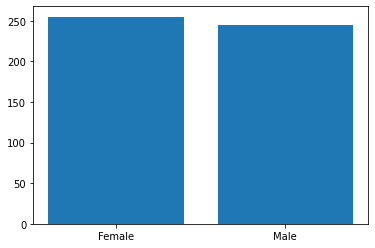

In [432]:
#Vẽ đồ thị thể hiện kết quả 
plt.bar(unique_gender.index, unique_gender.values)

In [433]:
#Thống kê theo cân nặng
unique_weight = df_bmi['Weight_kg'].value_counts()
unique_weight

80     9
104    9
50     9
96     8
70     8
      ..
91     1
63     1
93     1
134    1
53     1
Name: Weight_kg, Length: 110, dtype: int64

In [434]:
type(unique_weight)

pandas.core.series.Series

<BarContainer object of 110 artists>

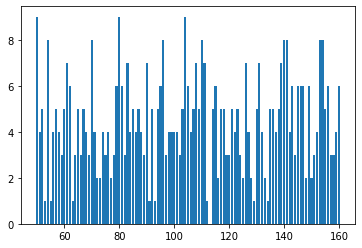

In [435]:
plt.bar(unique_weight.index,unique_weight.values)

# THỰC HÀNH 2:
---
**Yêu cầu 1.1:**
1. Đọc dữ liệu từ file .csv vào biến kiểu dataframe: df_patient với cột id là cột chỉ số (index_col)
2. Đặt lại tên các cột dữ liệu trong Dataframe: 
    * Feature_1 --> Age
    * Feature_2 --> Gender
    * Feature_3 --> Type
    * Feature_4 --> Blood_pressure
    * Feature_5 --> Cholesterol
    * Feature_6 --> Heartbeat
    * Feature_7 --> Thalassemia
    * Feature_8 --> Result

In [436]:
#{HỌC VIÊN VIẾT CODE Ở ĐÂY}
path = "D:\Source Code\Data_Analysis_Programming\Exercise_3\data\Data_Patient.csv"
df = pd.read_csv(path,index_col=0)
df = df.rename(columns={'feature_1': 'Age','feature_2': 'Gender','feature_3': 'Type','feature_4':'Blood_pressure','feature_5':'Cholesterol',
'feature_6':'Heartbeat','feature_7':'Thalassemia' ,'feature_8':'Result'})
df.head()





,Age,Gender,Type,Blood_pressure,Cholesterol,Heartbeat,Thalassemia,Result
id,,,,,,,,
Patient_01,63,Male,Typical angina,145,233,150,6.0,0
Patient_02,67,Male,Asymptomatic,160,286,108,3.0,1
Patient_03,67,Male,Asymptomatic,120,229,129,7.0,1
Patient_04,37,Male,Non-anginal pain,130,250,187,3.0,0
Patient_05,41,Female,Atypical angina,130,204,172,NaN,0


**Yêu cầu 2.2:**
Lọc dữ liệu trong df_patient thành các DataFrame:
    * df_male: chứa danh sách bệnh nhân Nam
    * df_female: chứa danh sách bệnh nhân nữ
    * df_no: danh sách những người không bị bệnh đau tim
    * df_yes: danh sách những người bị bệnh đau tim

In [437]:
#{HỌC VIÊN VIẾT CODE Ở ĐÂY}
df_male = df[df['Gender'] == 'Male']
df_female = df[df['Gender'] == 'Female']
df_no = df[df['Result'] == 0]
df_yes = df[df['Result'] == 1]





**Yêu cầu 2.3:**
Lọc trong df_patient dưa ra danh sách bệnh nhân thỏa mãn yêu cầu sau:
1. Những người bị mắc bệnh đau tim và trên 70 tuổi
2. Người có giới tính Female, có huyết áp trên 170 mmhg nhưng không bị bệnh đau tim.
3. Những người có triệu chứng đau ngực là Typical angina, giới tính Male và bị bệnh đau tim.

In [438]:
#{HỌC VIÊN VIẾT CODE Ở ĐÂY}
print("=====Những người bị mắc bệnh đau tim và trên 70 tuổi========")
df[(df['Result'] == 1) & (df['Age'] > 70)]






=====Những người bị mắc bệnh đau tim và trên 70 tuổi========


,Age,Gender,Type,Blood_pressure,Cholesterol,Heartbeat,Thalassemia,Result
id,,,,,,,,
Patient_161,77,Male,Asymptomatic,125,304,162,3.0,1


In [439]:
print("=====Người có giới tính Female, có huyết áp trên 170 mmhg nhưng không bị bệnh đau tim======")
df[(df['Gender']=='Female') & (df['Blood_pressure'] > 170) & (df['Result'] == 0)]

=====Người có giới tính Female, có huyết áp trên 170 mmhg nhưng không bị bệnh đau tim======


,Age,Gender,Type,Blood_pressure,Cholesterol,Heartbeat,Thalassemia,Result
id,,,,,,,,
Patient_201,64,Female,Asymptomatic,180,325,154,3.0,0


In [440]:
print("=== Những người có triệu chứng đau ngực là Typical angina, giới tính Male và bị bệnh đau tim.======")
df[(df['Type'] == 'Typical angina' ) & (df['Gender'] == 'Male') & (df['Result'] == 1)]

=== Những người có triệu chứng đau ngực là Typical angina, giới tính Male và bị bệnh đau tim.======


,Age,Gender,Type,Blood_pressure,Cholesterol,Heartbeat,Thalassemia,Result
id,,,,,,,,
Patient_124,65,Male,Typical angina,138,282,174,3.0,1
Patient_141,59,Male,Typical angina,170,288,159,7.0,1
Patient_199,59,Male,Typical angina,160,273,125,3.0,1
Patient_211,38,Male,Typical angina,120,231,182,7.0,1
Patient_243,61,Male,Typical angina,134,234,145,3.0,1
Patient_274,59,Male,Typical angina,134,204,162,3.0,1
Patient_298,45,Male,Typical angina,110,264,132,7.0,1


**Yêu cầu 2.4:** Xác định:
1. Chỉ số huyết áp (Blood_pressure) thấp nhất, cao nhất, trung bình, trung vị và độ lệch chuẩn của tập dữ liệu
2. Chỉ số nhịp tim (Heartbeat) thấp nhất, cao nhất, trung bình, trung vị và độ lệch chuẩn của tập dữ liệu


In [441]:
#{HỌC VIÊN VIẾT CODE Ở ĐÂY}
print("Chỉ số huyết áp (Blood_pressure) thấp nhất:",df['Blood_pressure'].min())
print("Chỉ số huyết áp (Blood_pressure) cao nhất: ",df['Blood_pressure'].max())
print("Chỉ số huyết áp (Blood_pressure) trung bình: ",df['Blood_pressure'].mean())
print("Chỉ số huyết áp (Blood_pressure) trung vị: ",df['Blood_pressure'].median())
print("Chỉ số huyết áp (Blood_pressure) và độ lệch chuẩn của tập dữ liệu: ",df['Blood_pressure'].std())




Chỉ số huyết áp (Blood_pressure) thấp nhất: 94
Chỉ số huyết áp (Blood_pressure) cao nhất:  200
Chỉ số huyết áp (Blood_pressure) trung bình:  131.68666666666667
Chỉ số huyết áp (Blood_pressure) trung vị:  130.0
Chỉ số huyết áp (Blood_pressure) và độ lệch chuẩn của tập dữ liệu:  17.682497692285473


In [442]:
print(" Chỉ số nhịp tim (Heartbeat) thấp nhất:",df['Heartbeat'].min())
print(" Chỉ số nhịp tim (Heartbeat) cao nhất: ",df['Heartbeat'].max())
print(" Chỉ số nhịp tim (Heartbeat) trung bình: ",df['Heartbeat'].mean())
print(" Chỉ số nhịp tim (Heartbeat) trung vị: ",df['Heartbeat'].median())
print(" Chỉ số nhịp tim (Heartbeat) và độ lệch chuẩn của tập dữ liệu: ",df['Heartbeat'].std())

 Chỉ số nhịp tim (Heartbeat) thấp nhất: 71
 Chỉ số nhịp tim (Heartbeat) cao nhất:  202
 Chỉ số nhịp tim (Heartbeat) trung bình:  149.56333333333333
 Chỉ số nhịp tim (Heartbeat) trung vị:  152.5
 Chỉ số nhịp tim (Heartbeat) và độ lệch chuẩn của tập dữ liệu:  22.818595118151105


**Yêu cầu 2.5: Xác định:**
1. Số giá trị khác nhau của thuộc tính Type
2. Vẽ đồ thị dạng cột thể hiện kết quả thống kê số lượng theo từng giá trị khác nhau của thuộc tính Type


In [443]:
#{HỌC VIÊN VIẾT CODE Ở ĐÂY}
print("Số giá trị khác nhau của thuộc tính Type = ",df['Type'].value_counts().count())






Số giá trị khác nhau của thuộc tính Type =  4


In [444]:
a = df['Type'].value_counts()

<BarContainer object of 4 artists>

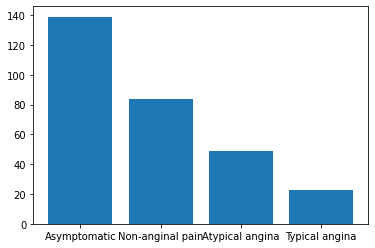

In [445]:
plt.bar(a.index,a.values)

## 7. Time Series Data
---
**Bài toán:**
* Người ta lắp đặt thiết bị để đếm số lượng xe đạp đi qua chiều phía đông và phía tây của cây cầu Fremont Bridge theo từng giờ.
* Chi tiết: https://data.seattle.gov/Transportation/Fremont-Bridge-Bicycle-Counter/65db-xm6k
----------------------
**Tập dữ liệu:**
* Tập dữ liệu là số lượng xe đạp đi qua cây cầu Fremont Bridge. Dữ liệu này được thu thập tự động thông qua các cảm biến ở 2 lối đi bộ ở phía đông và phía tây của cây cầu. Số lượng xe đạp được tổng hợp theo từng giờ.
* Tập dữ liệu bao gồm 4 cột:
    - Date: Thời gian (ngày - giờ): 10/03/2012 12:00:00 AM (Kiểu thời gian)
    - Fremont Bridge Total: Tổng số xe đi theo cả 2 lối đông và tây (Kiểu số nguyên)
    - Fremont Bridge East Sidewalk: Số xe đạp đi qua lối phía đông của cầu tương ứng với thời gian (Kiểu số nguyên)
    - Fremont Bridge West Sidewalk: Số xe đạp đi qua lối phía tây của cầu tương ứng với thời gian (Kiểu số nguyên)
-------------------------------
**Mục tiêu:**
1. Phân tích dữ liệu chuỗi thời gian (Time Series Data) sử dụng Pandas.
2. Kết hợp với các biểu đồ để tìm ra được những Insight ẩn chứa trong tập dữ liệu.


### 7.1) Đọc, quan sát và chuẩn hóa dữ liệu
---

In [446]:
#Đọc dữ liệu trong file csv
path='D:\Source Code\Data_Analysis_Programming\Exercise_3\data\Data_Bicycle_Counter.csv'
df_bicycle=pd.read_csv(path)
df_bicycle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135614 entries, 0 to 135613
Data columns (total 4 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Date                          135614 non-null  object 
 1   Fremont Bridge Total          135593 non-null  float64
 2   Fremont Bridge East Sidewalk  135593 non-null  float64
 3   Fremont Bridge West Sidewalk  135593 non-null  float64
dtypes: float64(3), object(1)
memory usage: 4.1+ MB


In [447]:
df_bicycle.head()

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,10/03/2012 12:00:00 AM,13.0,4.0,9.0
1,10/03/2012 01:00:00 AM,10.0,4.0,6.0
2,10/03/2012 02:00:00 AM,2.0,1.0,1.0
3,10/03/2012 03:00:00 AM,5.0,2.0,3.0
4,10/03/2012 04:00:00 AM,7.0,6.0,1.0


In [448]:
#Kiểm tra dữ liệu missing
df_bicycle.isnull().sum()

Date                             0
Fremont Bridge Total            21
Fremont Bridge East Sidewalk    21
Fremont Bridge West Sidewalk    21
dtype: int64

In [449]:
#Liệt kê các thời điểm không có dữ liệu (Missing values)
df_bicycle[df_bicycle.isnull().any(axis=1)]

#hoặc
#df_bicycle[pd.isnull(df_bicycle['Total'])]

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
6105,06/14/2013 09:00:00 AM,NaN,NaN,NaN
6106,06/14/2013 10:00:00 AM,NaN,NaN,NaN
12530,03/09/2014 02:00:00 AM,NaN,NaN,NaN
21266,03/08/2015 02:00:00 AM,NaN,NaN,NaN
22331,04/21/2015 11:00:00 AM,NaN,NaN,NaN
22332,04/21/2015 12:00:00 PM,NaN,NaN,NaN
30170,03/13/2016 02:00:00 AM,NaN,NaN,NaN
38906,03/12/2017 02:00:00 AM,NaN,NaN,NaN
47642,03/11/2018 02:00:00 AM,NaN,NaN,NaN
56378,03/10/2019 02:00:00 AM,NaN,NaN,NaN


In [450]:
# Đổi lại tên các cột cho ngắn gọn
df_bicycle.columns = ['Date','Total', 'East', 'West']
df_bicycle

,Date,Total,East,West
0,10/03/2012 12:00:00 AM,13.0,4.0,9.0
1,10/03/2012 01:00:00 AM,10.0,4.0,6.0
2,10/03/2012 02:00:00 AM,2.0,1.0,1.0
3,10/03/2012 03:00:00 AM,5.0,2.0,3.0
4,10/03/2012 04:00:00 AM,7.0,6.0,1.0
...,...,...,...,...
135609,08/31/2020 07:00:00 PM,190.0,79.0,111.0
135610,08/31/2020 08:00:00 PM,108.0,58.0,50.0
135611,08/31/2020 09:00:00 PM,33.0,11.0,22.0
135612,08/31/2020 10:00:00 PM,36.0,14.0,22.0


In [451]:
#Chuyển đổi dữ liệu cột Date về dạng chuỗi thời gian
df_bicycle['Date'] = pd.to_datetime(df_bicycle['Date'])
df_bicycle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135614 entries, 0 to 135613
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   Date    135614 non-null  datetime64[ns]
 1   Total   135593 non-null  float64       
 2   East    135593 non-null  float64       
 3   West    135593 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 4.1 MB


In [452]:
#Thiết lập cột Date làm index cho DataFrame

df_bicycle.set_index('Date',inplace=True)
df_bicycle.head()

,Total,East,West
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


## 7.2) Khám phá tập dữ liệu
---
### A) Sử dụng các đặc trưng thống kê

In [453]:
#Sử dụng sum tính tổng lượt người đi xe đạp
df_bicycle.sum()

Total    15341827.0
East      6997333.0
West      8344494.0
dtype: float64

In [454]:
#Sử dụng describe để quan sát các thông số
df_bicycle.describe()

,Total,East,West
count,135593.000000,135593.000000,135593.000000
mean,113.146158,51.605415,61.540743
std,143.810041,66.313631,89.549971
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,61.000000,28.000000,30.000000
75%,148.000000,69.000000,75.000000
max,1097.000000,698.000000,850.000000


In [455]:
#Thống kê số lượng xe đạp qua cầu phía West
w = df_bicycle['West'].value_counts()
print(w[:30])

1.0     6594
2.0     5908
0.0     5407
3.0     4807
4.0     3808
5.0     3200
6.0     2861
7.0     2426
8.0     2234
9.0     1949
10.0    1920
11.0    1808
13.0    1774
12.0    1714
16.0    1644
15.0    1639
14.0    1638
17.0    1468
18.0    1336
20.0    1314
19.0    1301
21.0    1251
23.0    1235
22.0    1210
26.0    1187
27.0    1172
30.0    1149
Name: West, dtype: int64


<BarContainer object of 686 artists>

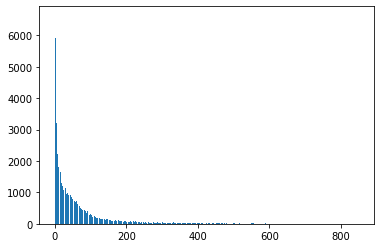

In [456]:
#Trực quan hóa số liệu thống kê
plt.bar(w.index,w.values)

In [457]:
#Thống kê số lượng xe đạp qua cầu phía West
e = df_bicycle['East'].value_counts()
print(e[:30])

1.0     6697
2.0     6318
0.0     5783
3.0     5101
4.0     4190
5.0     3530
6.0     2904
7.0     2644
8.0     2295
9.0     2004
10.0    1857
11.0    1818
12.0    1734
15.0    1561
13.0    1550
14.0    1467
18.0    1424
17.0    1415
19.0    1346
20.0    1308
16.0    1296
21.0    1273
26.0    1272
25.0    1246
23.0    1212
22.0    1203
27.0    1153
28.0    1145
24.0    1124
30.0    1096
Name: East, dtype: int64


<BarContainer object of 493 artists>

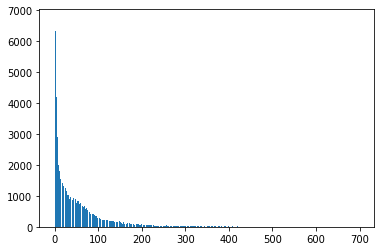

In [458]:
#Trực quan hóa số liệu thống kê
plt.bar(e.index,e.values)

### Phát hiện 1:
----
1. Số lượng người đi xe đạp bên cầu phía West (8 344 494) cao hơn cầu phía East (6 997 333)
2. Lượng người đi qua từng bên cầu cao nhất theo giờ 850 lượt, toàn bộ 1097 lượt
3. Lượng người đi xe đạp qua cầu chủ yếu nhỏ dưới 30 lượt

### B) Phương pháp Phân tích chuỗi thời gian
---

### 1) Thống kê tổng số lượng đi xe đạp theo năm để thấy xu hướng chung

In [459]:
df_bicycle.index

DatetimeIndex(['2012-10-03 00:00:00', '2012-10-03 01:00:00',
               '2012-10-03 02:00:00', '2012-10-03 03:00:00',
               '2012-10-03 04:00:00', '2012-10-03 05:00:00',
               '2012-10-03 06:00:00', '2012-10-03 07:00:00',
               '2012-10-03 08:00:00', '2012-10-03 09:00:00',
               ...
               '2020-08-31 14:00:00', '2020-08-31 15:00:00',
               '2020-08-31 16:00:00', '2020-08-31 17:00:00',
               '2020-08-31 18:00:00', '2020-08-31 19:00:00',
               '2020-08-31 20:00:00', '2020-08-31 21:00:00',
               '2020-08-31 22:00:00', '2020-08-31 23:00:00'],
              dtype='datetime64[ns]', name='Date', length=135614, freq=None)

In [460]:
#Dữ liệu bắt đầu từ 3/10/2012 --> 31/08/2020 
#Tách dữ liệu chỉ lấy từ năm 2013 - 2019
df_full_year = df_bicycle.loc['2013':'2019']
df_full_year.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 122688 entries, 2013-01-01 00:00:00 to 2019-12-31 23:00:00
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Total   122668 non-null  float64
 1   East    122668 non-null  float64
 2   West    122668 non-null  float64
dtypes: float64(3)
memory usage: 3.7 MB


In [461]:
#Tổng hợp số liệu chuỗi thời gian theo từng năm
#Tính tổng số lượt qua cầu theo năm
yearly = df_full_year.resample('Y').sum() #Tính tổng theo năm
yearly

,Total,East,West
Date,,,
2013-12-31,1856558.0,957982.0,898576.0
2014-12-31,2012392.0,1030652.0,981740.0
2015-12-31,1973112.0,1001830.0,971282.0
2016-12-31,1964940.0,936608.0,1028332.0
2017-12-31,1926270.0,825010.0,1101260.0
2018-12-31,2103760.0,851310.0,1252450.0
2019-12-31,2374292.0,899708.0,1474584.0


Text(0.5, 1.0, 'ĐỒ THỊ THỐNG KÊ SỐ LƯỢNG THEO NĂM')

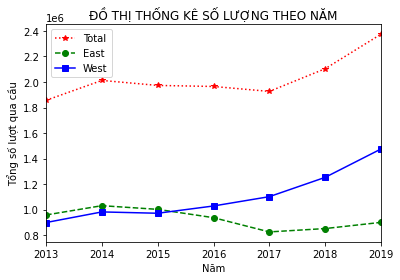

In [462]:
#Trực quan hóa trên biểu đồ
yearly.plot(style=[':*', '--o', '-s'], color=['red','green','blue'])
plt.ylabel('Tổng số lượt qua cầu')
plt.xlabel('Năm')
plt.title('ĐỒ THỊ THỐNG KÊ SỐ LƯỢNG THEO NĂM')

### Phát hiện 2:Từ biểu đồ thống kê tổng số xe đạp qua cầu theo năm ta thấy:
---
* Số lượng người đi xe đạp qua cầu Fremont có xu hướng tăng lên theo từng năm, những năm gần đây tăng nhanh.
* Lượt xe đạp qua lối đi phía tây nhiều hơn lối đi phía đông, và cũng có xu hướng tăng nhanh trong những năng gần đây.

## 2) Thống kê số lượng người đi xe đạp theo tháng để thấy xu hướng mùa vụ
---

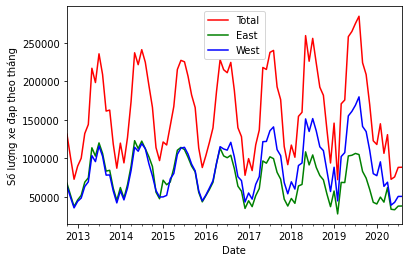

In [463]:
#Thống kê số lượng xe theo tháng qua phía Đông, Tây và Toàn bộ
data_month = df_bicycle.resample('M').sum() #Tính tổng lượt đi theo tháng
data_month.plot(style=['-', '-', '-'], color=['red','green','blue'])
plt.ylabel('Số lượng xe đạp theo tháng');
plt.show()

In [464]:
data_month

,Total,East,West
Date,,,
2012-10-31,131390.0,67528.0,63862.0
2012-11-30,101294.0,52124.0,49170.0
2012-12-31,72738.0,37216.0,35522.0
2013-01-31,89768.0,45820.0,43948.0
2013-02-28,100054.0,51796.0,48258.0
...,...,...,...
2020-04-30,130750.0,61868.0,68882.0
2020-05-31,72668.0,33702.0,38966.0
2020-06-30,75787.0,33053.0,42734.0


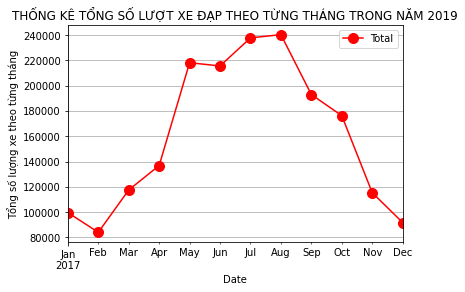

In [465]:
#Hiển thị chi tiết dữ liệu theo tháng của một năm cụ thể [2019].
data_2019 = df_bicycle.loc['2017',['Total']]
df_month_19 = data_2019.resample('M').sum() #Tính tổng theo tháng
df_month_19.plot(marker='o', markersize='10', color='red')
plt.ylabel('Tổng số lượng xe theo từng tháng')
plt.title('THỐNG KÊ TỔNG SỐ LƯỢT XE ĐẠP THEO TỪNG THÁNG TRONG NĂM 2019',loc='center')
plt.grid()
plt.show()

### Phát hiện 3: Từ biểu đồ thể hiện lượng xe đạp qua cầu theo tháng ta thấy:
---
* Dữ liệu chuỗi thời gian có tính thời vụ (seasonal)
* Mọi người đạp xe nhiều hơn vào các tháng mùa hè và ít hơn vào các tháng mùa đông (4 tháng có số lượng người đạp xe nhiều nhất:5, 6, 7 và 8)

--> **Dữ liệu chuỗi thời gian về lượng xe đạp qua cầu có tính xu hướng (tăng dần) và tính thời vụ (số lượng nhiều hơn vào các tháng mùa hè và ít hơn vào các tháng mùa đông)**

## 3) Thống kê lượng đi xe đạp theo giờ
---

In [466]:
#Tính trung bình lượng xe theo từng giờ qua cầu trong toàn bộ tập dữ liệu
by_time = df_bicycle.groupby(df_bicycle.index.time).mean()
by_time

,Total,East,West
00:00:00,11.304902,4.791541,6.513360
01:00:00,5.984074,2.680764,3.303309
02:00:00,3.938453,1.890032,2.048421
03:00:00,2.903557,1.493895,1.409662
04:00:00,6.487878,3.440807,3.047071
05:00:00,25.589630,15.619182,9.970448
06:00:00,89.945496,54.047779,35.897717
07:00:00,227.002831,140.801982,86.200849
08:00:00,322.147231,189.640241,132.506990
09:00:00,188.577093,102.221101,86.355992


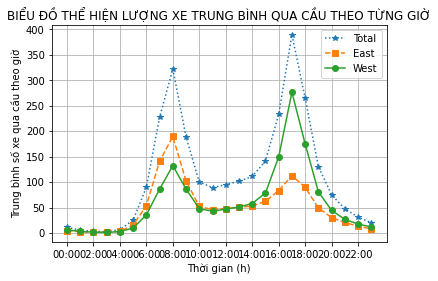

In [467]:
#Trực quan hóa dữ liệu:
hourly_ticks = 2 * 60 * 60 * np.arange(12)
by_time.plot(xticks=hourly_ticks, style=[':*', '--s', '-o'])
plt.grid()
plt.xlabel('Thời gian (h)')
plt.ylabel('Trung bình số xe qua cầu theo giờ')
plt.title('BIỂU ĐỒ THỂ HIỆN LƯỢNG XE TRUNG BÌNH QUA CẦU THEO TỪNG GIỜ',loc='center')
plt.show()

### Phát hiện 4: Từ biểu đồ thể hiện lượng xe đạp qua cầu trung bình theo giờ ta thấy:
---
* Lượng người đi xe đạp qua cầu chủ yếu tập trung vào thời điểm 7,8,9h buổi sáng | 16, 17, 18h buổi chiều
* Lượng người đi nhiều nhất vào thời điểm 8(h) sáng - 17h chiều.
* Thời điểm buổi sáng lượng người đi qua cầu làn phía Đông (East) Lớn hơn làn phía Tây (Đi từ bên ngoài bào trung tâm thành phố Seattle) | Buổi chiều lượng người đi qua cầu làn phía Tây (West) lơn hơn (đi ra khỏi trung tâm thành phố). 

## 4) Thống kê lượng xe trung bình theo ngày trong tuần
---

In [468]:
#Nhóm dữ liệu theo ngày trong tuần và tính trung bình
df_weekday = df_bicycle.groupby(df_bicycle.index.dayofweek).mean()
#Đổi tên index theo ngày dễ quan sát
df_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
df_weekday


,Total,East,West
Mon,132.039395,58.638527,73.400867
Tues,140.619442,62.726267,77.893175
Wed,139.598217,62.306091,77.292126
Thurs,132.737108,59.636035,73.101073
Fri,120.132101,53.894702,66.237399
Sat,64.290376,32.242720,32.047656
Sun,62.537484,31.765849,30.771635


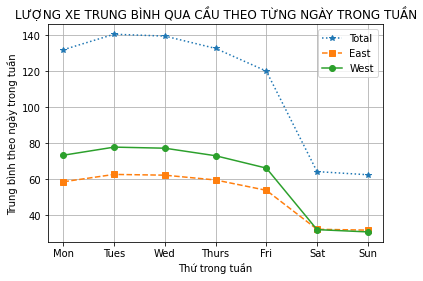

In [469]:
#Trực quan hóa dữ liệu lên đồ thị
stick =['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
df_weekday.plot(style=[':*', '--s', '-o']);
plt.grid()
plt.xlabel('Thứ trong tuần')
plt.ylabel('Trung bình theo ngày trong tuần')
plt.title('LƯỢNG XE TRUNG BÌNH QUA CẦU THEO TỪNG NGÀY TRONG TUẦN',loc='center')
plt.show()

In [470]:
#Thực hiện thống kê số lượng người đi xe đạp qua cầu
#Tách giữa ngày làm việc [thứ 2 - thứ 5] và ngày cuối tuần [thứ 7, CN]
df_weekend = np.where(df_bicycle.index.weekday < 5, 'Weekday', 'Weekend')
#Tính lượng người đi qua trung bình theo giờ giữa các ngày trong tuần và cuối tuần
df_by_time = df_bicycle.groupby([df_weekend, df_bicycle.index.time]).mean()
df_by_time

Total        East        West
Weekday 00:00:00    9.457766    4.056725    5.401040
        01:00:00    4.685410    2.105772    2.579638
        02:00:00    3.124102    1.540253    1.583849
        03:00:00    2.684667    1.400297    1.284370
        04:00:00    7.548427    4.185286    3.363141
        05:00:00   32.884815   20.301214   12.583602
        06:00:00  119.124102   72.465940   46.658162
        07:00:00  304.762200  190.401784  114.360416
        08:00:00  426.898935  252.931880  173.967055
        09:00:00  231.165056  125.983147  105.181908
        10:00:00  100.296159   52.005700   48.290458
        11:00:00   76.339281   39.444857   36.894424
        12:00:00   79.305576   39.797274   39.508302
        13:00:00   85.723309   41.936587   43.786723
        14:00:00   97.395937   44.588949   52.806987
        15:00:00  140.262884   58.340436   81.922448
        16:00:00  273.199950   90.102577  183.097374
        17:00:00  500.728444  135.932607  364.795837
        18:00:00  336.802279  108.514866  228.287413
        19:00:00  159.925917   58.199950  101.725966
        20:00:00   88.395937   34.831021   53.564916
        21:00:00   55.300793   23.790882   31.509911
        22:00:00   34.888503   14.838206   20.050297
        23:00:00   21.797324    8.888008   12.909316
Weekend 00:00:00   15.925031    6.629492    9.295539
        01:00:00    9.232342    4.118959    5.113383
        02:00:00    5.991880    2.772017    3.219863
        03:00:00    3.451053    1.728005    1.723048
        04:00:00    3.835192    1.578686    2.256506
        05:00:00    7.342627    3.908302    3.434325
        06:00:00   16.962825    7.979554    8.983271
        07:00:00   32.508055   16.741016   15.767038
        08:00:00   60.138166   31.332714   28.805452
        09:00:00   82.107187   42.815985   39.291202
        10:00:00  100.466543   53.307931   47.158612
        11:00:00  121.429988   62.970880   58.459108
        12:00:00  135.104089   69.325898   65.778191
        13:00:00  142.465923   72.584882   69.881041
        14:00:00  145.470880   74.059480   71.411400
        15:00:00  143.983891   73.043371   70.940520
        16:00:00  132.460347   66.864932   65.595415
        17:00:00  110.272615   55.041512   55.231103
        18:00:00   84.885378   42.539033   42.346344
        19:00:00   57.275093   28.172243   29.102850
        20:00:00   41.561338   19.641264   21.920074
        21:00:00   29.341388   13.668525   15.672862
        22:00:00   21.982652    9.896530   12.086121
        23:00:00   17.284387    7.148079   10.136307

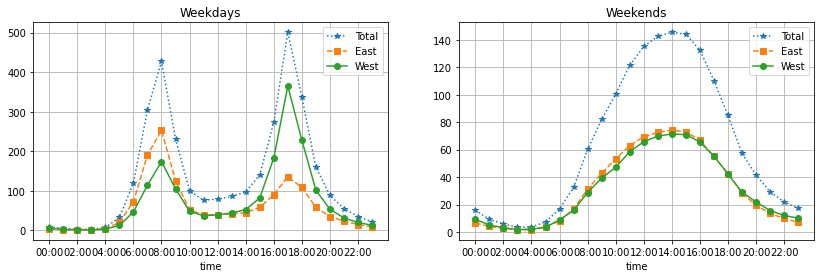

In [471]:
#Trực quan hóa dữ liệu
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
df_by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',
                           xticks=hourly_ticks, style=[':*', '--s', '-o'], grid=True)
df_by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks=hourly_ticks, style=[':*', '--s', '-o'], grid=True);

### Phát hiện 5: Từ biểu đồ thể hiện lượng xe đạp qua cầu trung bình theo ngày trong tuần:
---
* Lượng người đi xe đạp qua cầu chủ yếu vào các ngày làm việc trong tuần [thứ 2 --> thứ 6]; Cuối tuần [Thứ 7, CN] lượng người đi qua cầu giảm đi đáng kể. Lượng người đi qua cầu ngày làm việc gấp đôi ngày cuối tuần.
* Vào các ngày làm việc trong tuần lượng người đi xe đạp qua cầu chủ yếu tập trung vào thời điểm 7,8,9h buổi sáng | 16, 17, 18h buổi chiều. Lượng người đi nhiều nhất vào thời điểm 8(h) sáng - 17h chiều.
* Vào các ngày cuối tuần, người đi xe đạp chủ yếu qua cầu trong thời gian từ 12-16h

## THỰC HÀNH SỐ 3
---
Dựa vào dữ liệu chuỗi thời gian quan trắc thông số nhiệt độ của Hà Giang và Cà Mau từ năm 2012 đến 2019 (Data_Temperature.csv), sử dụng các kỹ thuật để tìm ra những thông tin từ 2 bộ dữ liệu đó.

In [472]:
#{HỌC VIÊN VIẾT CODE Ở ĐÂY}
df = pd.read_csv("D:\Source Code\Data_Analysis_Programming\Exercise_3\data\Data_Temperature.csv")
df.head()








,TimeVN,HaGiang,CaMau
0,2012-08-01 7:00,26.200001,25.400000
1,2012-08-01 10:00,31.400000,30.799999
2,2012-08-01 13:00,35.099998,30.000000
3,2012-08-01 16:00,35.799999,27.700001
4,2012-08-01 19:00,30.400000,28.100000


In [473]:
df.isnull().sum()

TimeVN       0
HaGiang    196
CaMau      250
dtype: int64

In [474]:
#Liệt kê các thời điểm không có dữ liệu (Missing values)
df[df.isnull().any(axis=1)]


,TimeVN,HaGiang,CaMau
19,2012-08-03 16:00,NaN,28.900000
20,2012-08-03 19:00,NaN,27.600000
21,2012-08-03 22:00,NaN,27.000000
22,2012-08-04 1:00,NaN,26.700001
23,2012-08-04 4:00,NaN,26.799999
...,...,...,...
12005,2016-09-09 22:00,27.900000,NaN
12076,2016-09-18 19:00,27.100000,NaN
12299,2016-10-16 16:00,33.200001,NaN
13163,2017-02-01 16:00,21.400000,NaN


In [475]:
print("Nhiệt độ trung bình của Hà Giang = ",df['HaGiang'].mean())
print("Nhiêt độ trung bình cảu Cà Mau: ", df['CaMau'].mean())
print("Nhiệt độ cao nhất của Hà Giang: ",df['HaGiang'].max())
print("Nhiệt độ thấp nhất của Cà Mau: ",df['CaMau'].min())

Nhiệt độ trung bình của Hà Giang =  23.786183294255846
Nhiêt độ trung bình cảu Cà Mau:  27.99465918453506
Nhiệt độ cao nhất của Hà Giang:  39.0
Nhiệt độ thấp nhất của Cà Mau:  7.300000191


In [476]:
df.describe()

,HaGiang,CaMau
count,21474.000000,21420.000000
mean,23.786183,27.994659
std,5.558138,2.485884
min,1.000000,7.300000
25%,19.799999,26.400000
50%,24.600000,27.600000
75%,27.500000,29.600000
max,39.000000,36.400002


In [477]:
df.shape

(21670, 3)

In [478]:
df.head()

,TimeVN,HaGiang,CaMau
0,2012-08-01 7:00,26.200001,25.400000
1,2012-08-01 10:00,31.400000,30.799999
2,2012-08-01 13:00,35.099998,30.000000
3,2012-08-01 16:00,35.799999,27.700001
4,2012-08-01 19:00,30.400000,28.100000


In [479]:
#Chuyển đổi dữ liệu cột TimeVn về dạng chuỗi thời gian
df['TimeVN'] = pd.to_datetime(df['TimeVN'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21670 entries, 0 to 21669
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   TimeVN   21670 non-null  datetime64[ns]
 1   HaGiang  21474 non-null  float64       
 2   CaMau    21420 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 508.0 KB


In [480]:
df.columns

Index(['TimeVN', 'HaGiang', 'CaMau'], dtype='object')

In [481]:
df.set_index('TimeVN',inplace=True)

In [482]:
df.head()

,HaGiang,CaMau
TimeVN,,
2012-08-01 07:00:00,26.200001,25.400000
2012-08-01 10:00:00,31.400000,30.799999
2012-08-01 13:00:00,35.099998,30.000000
2012-08-01 16:00:00,35.799999,27.700001
2012-08-01 19:00:00,30.400000,28.100000


In [483]:
# Thống kê nhiệt độ của Hà Giang
v = df['HaGiang'].value_counts()

Text(0.5, 0, 'Temperature')

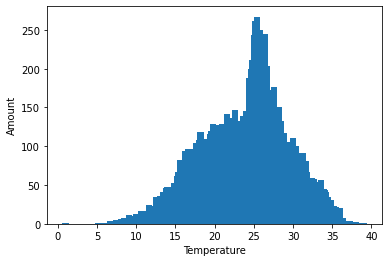

In [484]:
import matplotlib.pyplot as plt
plt.bar(v.index,v.values)
plt.ylabel('Amount',fontsize = 10)
plt.xlabel('Temperature', fontsize = 10)

In [485]:
# Thống kê nhiệt độ của Cà Mau
c = df['CaMau'].value_counts()

<BarContainer object of 178 artists>

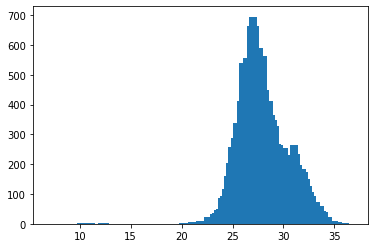

In [486]:
plt.bar(c.index,c.values)

In [487]:
df.index

DatetimeIndex(['2012-08-01 07:00:00', '2012-08-01 10:00:00',
               '2012-08-01 13:00:00', '2012-08-01 16:00:00',
               '2012-08-01 19:00:00', '2012-08-01 22:00:00',
               '2012-08-02 01:00:00', '2012-08-02 04:00:00',
               '2012-08-02 07:00:00', '2012-08-02 10:00:00',
               ...
               '2019-12-30 19:00:00', '2019-12-30 22:00:00',
               '2019-12-31 01:00:00', '2019-12-31 04:00:00',
               '2019-12-31 07:00:00', '2019-12-31 10:00:00',
               '2019-12-31 13:00:00', '2019-12-31 16:00:00',
               '2019-12-31 19:00:00', '2019-12-31 22:00:00'],
              dtype='datetime64[ns]', name='TimeVN', length=21670, freq=None)

In [488]:
# Lấy dữ liệu từ năm 2012-2013
df_new = df.loc['2012': '2013']

In [489]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4142 entries, 2012-08-01 07:00:00 to 2013-12-31 22:00:00
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   HaGiang  3962 non-null   float64
 1   CaMau    3953 non-null   float64
dtypes: float64(2)
memory usage: 97.1 KB


In [490]:
yearly = df_new.resample('Y').sum()
yearly

,HaGiang,CaMau
TimeVN,,
2012-12-31,28087.800009,32886.999902
2013-12-31,64339.800021,76821.999884


Text(0, 0.5, 'Tổng nhiệt độ')

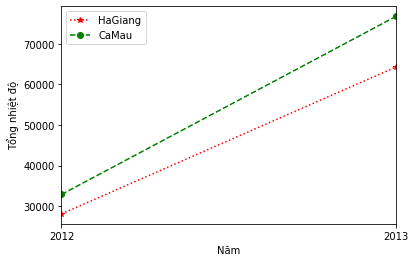

In [491]:
yearly.plot(style=[':*', '--o', '-s'], color=['red','green','blue'])
plt.xlabel('Năm')
plt.ylabel("Tổng nhiệt độ")

In [492]:
# Thống kê nhiệt độ qua từng tháng
df_new_2 = df.loc['2012'] # dữ liệu năm 2012
data_month = df_new_2.resample('M').sum()
data_month

,HaGiang,CaMau
TimeVN,,
2012-08-31,6636.300007,6607.199993
2012-09-30,5972.399992,6025.499973
2012-10-31,5966.400000,6751.799979
2012-11-30,5115.200002,6658.900000
2012-12-31,4397.500009,6843.599957


Text(0, 0.5, 'Tổng nhiệt độ theo từng tháng')

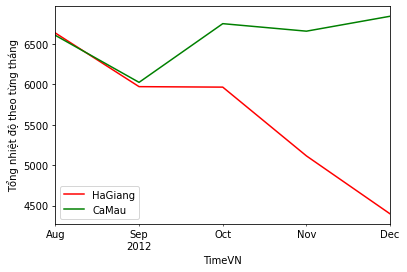

In [493]:
data_month.plot(style=['-', '-', '-'], color=['red','green','blue'])
plt.ylabel("Tổng nhiệt độ theo từng tháng")

In [494]:
# Nhiệt độ của tháng Thứ 8 trong năm 2012
data_day = df_new_2.resample('D').sum()

Text(0, 0.5, 'Tổng nhiệt độ theo từng ngày')

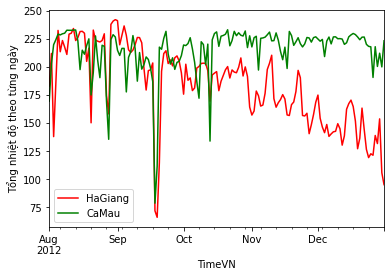

In [495]:
data_day.plot(style=['-', '-', '-'], color=['red','green','blue'])
plt.ylabel("Tổng nhiệt độ theo từng ngày")

In [496]:
by_time = df.groupby(df.index.time).mean()
by_time

,HaGiang,CaMau
01:00:00,22.022268,26.610396
04:00:00,21.471594,26.145578
07:00:00,21.426144,26.430194
10:00:00,24.211136,29.528656
13:00:00,26.886850,30.583290
16:00:00,27.014504,29.727191
19:00:00,24.347190,27.825103
22:00:00,22.884136,27.084572


<AxesSubplot:xlabel='time'>

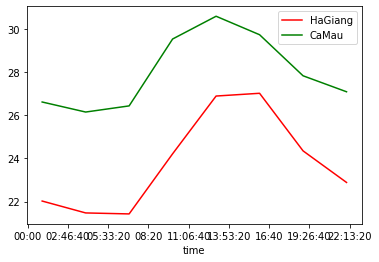

In [497]:
by_time.plot(style=['-', '-', '-'], color=['red','green','blue'])